### Importing Libraries

In [1]:
import os
import json
import pandas as pd
import numpy as np

#Importing libraries required for the case study and to plot charts
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import plot
import plotly.graph_objects as go
import plotly.express as px
from wordcloud import WordCloud
%matplotlib inline

#Importing libraries for String manipulation and text preprocessing
import re, nltk, spacy, string
nlp = spacy.load('en_core_web_sm')

# hide warnings
import warnings
warnings.filterwarnings('ignore')

# set options
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option('display.max_colwidth', -1)

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split

### Loading Data

In [2]:
root_path = 'Client_data.json'

# Opening JSON file
f = open(root_path)
 
# returns JSON object as a dictionary
data = json.load(f)

### Data Preparation

In [3]:
df = pd.json_normalize(data)

In [4]:
# Understanding the given data
df.head()

,_index,_type,_id,_score,_source.tags,_source.zip_code,_source.complaint_id,_source.issue,_source.date_received,_source.state,_source.consumer_disputed,_source.product,_source.company_response,_source.company,_source.submitted_via,_source.date_sent_to_company,_source.company_public_response,_source.sub_product,_source.timely,_source.complaint_what_happened,_source.sub_issue,_source.consumer_consent_provided
0,complaint-public-v2,complaint,3211475,0.0,None,90301,3211475,Attempts to collect debt not owed,2019-04-13T12:00:00-05:00,CA,N/A,Debt collection,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-13T12:00:00-05:00,None,Credit card debt,Yes,,Debt is not yours,Consent not provided
1,complaint-public-v2,complaint,3229299,0.0,Servicemember,319XX,3229299,Written notification about debt,2019-05-01T12:00:00-05:00,GA,N/A,Debt collection,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-05-01T12:00:00-05:00,None,Credit card debt,Yes,Good morning my name is XXXX XXXX and I appreciate it if you could help me put a stop to Chase Bank cardmember services. \nIn 2018 I wrote to Chase asking for debt verification and what they sent me a statement which is not acceptable. I am asking the bank to validate the debt. Instead I been receiving mail every month from them attempting to collect a debt. \nI have a right to know this information as a consumer. \n\nChase account # XXXX XXXX XXXX XXXX Thanks in advance for your help.,Didn't receive enough information to verify debt,Consent provided
2,complaint-public-v2,complaint,3199379,0.0,None,77069,3199379,"Other features, terms, or problems",2019-04-02T12:00:00-05:00,TX,N/A,Credit card or prepaid card,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-02T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,I upgraded my XXXX XXXX card in XX/XX/2018 and was told by the agent who did the upgrade my anniversary date would not change. It turned the agent was giving me the wrong information in order to upgrade the account. XXXX changed my anniversary date from XX/XX/XXXX to XX/XX/XXXX without my consent! XXXX has the recording of the agent who was misled me.,Problem with rewards from credit card,Consent provided
3,complaint-public-v2,complaint,2673060,0.0,None,48066,2673060,Trouble during payment process,2017-09-13T12:00:00-05:00,MI,N/A,Mortgage,Closed with explanation,JPMORGAN CHASE & CO.,Web,2017-09-14T12:00:00-05:00,None,Conventional home mortgage,Yes,,None,Consent not provided
4,complaint-public-v2,complaint,3203545,0.0,None,10473,3203545,Fees or interest,2019-04-05T12:00:00-05:00,NY,N/A,Credit card or prepaid card,Closed with explanation,JPMORGAN CHASE & CO.,Referral,2019-04-05T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,,Charged too much interest,N/A


In [5]:
df.index

RangeIndex(start=0, stop=78313, step=1)

In [6]:
df.columns

Index(['_index', '_type', '_id', '_score', '_source.tags', '_source.zip_code',
       '_source.complaint_id', '_source.issue', '_source.date_received',
       '_source.state', '_source.consumer_disputed', '_source.product',
       '_source.company_response', '_source.company', '_source.submitted_via',
       '_source.date_sent_to_company', '_source.company_public_response',
       '_source.sub_product', '_source.timely',
       '_source.complaint_what_happened', '_source.sub_issue',
       '_source.consumer_consent_provided'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78313 entries, 0 to 78312
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   _index                             78313 non-null  object 
 1   _type                              78313 non-null  object 
 2   _id                                78313 non-null  object 
 3   _score                             78313 non-null  float64
 4   _source.tags                       10900 non-null  object 
 5   _source.zip_code                   71556 non-null  object 
 6   _source.complaint_id               78313 non-null  object 
 7   _source.issue                      78313 non-null  object 
 8   _source.date_received              78313 non-null  object 
 9   _source.state                      76322 non-null  object 
 10  _source.consumer_disputed          78313 non-null  object 
 11  _source.product                    78313 non-null  obj

In [8]:
df.isna().sum()

_index                               0    
_type                                0    
_id                                  0    
_score                               0    
_source.tags                         67413
_source.zip_code                     6757 
_source.complaint_id                 0    
_source.issue                        0    
_source.date_received                0    
_source.state                        1991 
_source.consumer_disputed            0    
_source.product                      0    
_source.company_response             0    
_source.company                      0    
_source.submitted_via                0    
_source.date_sent_to_company         0    
_source.company_public_response      78309
_source.sub_product                  10571
_source.timely                       0    
_source.complaint_what_happened      0    
_source.sub_issue                    46297
_source.consumer_consent_provided    1008 
dtype: int64

In [9]:
df = df[['_source.complaint_what_happened', '_source.product', '_source.sub_product']]
df.head()

,_source.complaint_what_happened,_source.product,_source.sub_product
0,,Debt collection,Credit card debt
1,Good morning my name is XXXX XXXX and I appreciate it if you could help me put a stop to Chase Bank cardmember services. \nIn 2018 I wrote to Chase asking for debt verification and what they sent me a statement which is not acceptable. I am asking the bank to validate the debt. Instead I been receiving mail every month from them attempting to collect a debt. \nI have a right to know this information as a consumer. \n\nChase account # XXXX XXXX XXXX XXXX Thanks in advance for your help.,Debt collection,Credit card debt
2,I upgraded my XXXX XXXX card in XX/XX/2018 and was told by the agent who did the upgrade my anniversary date would not change. It turned the agent was giving me the wrong information in order to upgrade the account. XXXX changed my anniversary date from XX/XX/XXXX to XX/XX/XXXX without my consent! XXXX has the recording of the agent who was misled me.,Credit card or prepaid card,General-purpose credit card or charge card
3,,Mortgage,Conventional home mortgage
4,,Credit card or prepaid card,General-purpose credit card or charge card


In [10]:
df = df.rename(columns={'_source.complaint_what_happened':'complaint_text', '_source.product':'category', '_source.sub_product':'sub_category'})
df.head()

,complaint_text,category,sub_category
0,,Debt collection,Credit card debt
1,Good morning my name is XXXX XXXX and I appreciate it if you could help me put a stop to Chase Bank cardmember services. \nIn 2018 I wrote to Chase asking for debt verification and what they sent me a statement which is not acceptable. I am asking the bank to validate the debt. Instead I been receiving mail every month from them attempting to collect a debt. \nI have a right to know this information as a consumer. \n\nChase account # XXXX XXXX XXXX XXXX Thanks in advance for your help.,Debt collection,Credit card debt
2,I upgraded my XXXX XXXX card in XX/XX/2018 and was told by the agent who did the upgrade my anniversary date would not change. It turned the agent was giving me the wrong information in order to upgrade the account. XXXX changed my anniversary date from XX/XX/XXXX to XX/XX/XXXX without my consent! XXXX has the recording of the agent who was misled me.,Credit card or prepaid card,General-purpose credit card or charge card
3,,Mortgage,Conventional home mortgage
4,,Credit card or prepaid card,General-purpose credit card or charge card


In [11]:
# Merging the category and sub-category as it will help us in deciding the topics after NMF modelling
df['category'] = df['category'] + ' + ' + df['sub_category']
df = df.drop(['sub_category'],axis= 1)
df.head()

,complaint_text,category
0,,Debt collection + Credit card debt
1,Good morning my name is XXXX XXXX and I appreciate it if you could help me put a stop to Chase Bank cardmember services. \nIn 2018 I wrote to Chase asking for debt verification and what they sent me a statement which is not acceptable. I am asking the bank to validate the debt. Instead I been receiving mail every month from them attempting to collect a debt. \nI have a right to know this information as a consumer. \n\nChase account # XXXX XXXX XXXX XXXX Thanks in advance for your help.,Debt collection + Credit card debt
2,I upgraded my XXXX XXXX card in XX/XX/2018 and was told by the agent who did the upgrade my anniversary date would not change. It turned the agent was giving me the wrong information in order to upgrade the account. XXXX changed my anniversary date from XX/XX/XXXX to XX/XX/XXXX without my consent! XXXX has the recording of the agent who was misled me.,Credit card or prepaid card + General-purpose credit card or charge card
3,,Mortgage + Conventional home mortgage
4,,Credit card or prepaid card + General-purpose credit card or charge card


In [12]:
df['category'].value_counts()

Credit card or prepaid card + General-purpose credit card or charge card                                         10504
Checking or savings account + Checking account                                                                   10066
Mortgage + Other mortgage                                                                                        8447 
Bank account or service + Checking account                                                                       7116 
Mortgage + Conventional fixed mortgage                                                                           4892 
Credit reporting, credit repair services, or other personal consumer reports + Credit reporting                  4172 
Mortgage + Conventional home mortgage                                                                            2636 
Mortgage + FHA mortgage                                                                                          1960 
Mortgage + Conventional adjustable mortgage (ARM

In [13]:
# Replacing empty complaints with nan value
df = df.replace(r'^\s*$', np.nan, regex=True)
df.head()

,complaint_text,category
0,NaN,Debt collection + Credit card debt
1,Good morning my name is XXXX XXXX and I appreciate it if you could help me put a stop to Chase Bank cardmember services. \nIn 2018 I wrote to Chase asking for debt verification and what they sent me a statement which is not acceptable. I am asking the bank to validate the debt. Instead I been receiving mail every month from them attempting to collect a debt. \nI have a right to know this information as a consumer. \n\nChase account # XXXX XXXX XXXX XXXX Thanks in advance for your help.,Debt collection + Credit card debt
2,I upgraded my XXXX XXXX card in XX/XX/2018 and was told by the agent who did the upgrade my anniversary date would not change. It turned the agent was giving me the wrong information in order to upgrade the account. XXXX changed my anniversary date from XX/XX/XXXX to XX/XX/XXXX without my consent! XXXX has the recording of the agent who was misled me.,Credit card or prepaid card + General-purpose credit card or charge card
3,NaN,Mortgage + Conventional home mortgage
4,NaN,Credit card or prepaid card + General-purpose credit card or charge card


In [14]:
df.isna().sum()

complaint_text    57241
category          10571
dtype: int64

In [15]:
# Dropping rows containing NaN values in complaints column
df = df.dropna(subset=['complaint_text'])

In [16]:
df.reset_index(drop=True, inplace=True)

In [17]:
df.isna().sum()

complaint_text    0   
category          2109
dtype: int64

In [18]:
df.shape

(21072, 2)

### Text Preprocessing

In [19]:
#Add Stopwords to default stopwords in Spacy to remove masked personal details 
nlp.Defaults.stop_words |= {"xxxx","xx", "xxxxxxxx", "chase"}

In [20]:
stopwords = nlp.Defaults.stop_words

In [21]:
# Function to clean the text and remove all the unnecessary elements, stopwords and then lemmatize text and remove everything except nouns
def cleaning(complaint):
    corpus = []
    for item in complaint:
        x = str(item).lower()   # Lowercasing text
        x = re.sub('[^a-zA-Z]',' ',x) # Removing everthing except alphabets 
        obj = nlp(x)
        sent = [token.lemma_ and token.text for token in obj if not token.text in set(stopwords) and token.tag_ == 'NN' ] #lemmatizing the text and removing stopwords and keeping nouns
        corpus.append(' '.join(sent))
    return corpus
        

In [22]:
# Making a dummy data for testing purpose as Original Data takes lots of time to process 
dummy = df.iloc[:10]
dummy.head()

,complaint_text,category
0,Good morning my name is XXXX XXXX and I appreciate it if you could help me put a stop to Chase Bank cardmember services. \nIn 2018 I wrote to Chase asking for debt verification and what they sent me a statement which is not acceptable. I am asking the bank to validate the debt. Instead I been receiving mail every month from them attempting to collect a debt. \nI have a right to know this information as a consumer. \n\nChase account # XXXX XXXX XXXX XXXX Thanks in advance for your help.,Debt collection + Credit card debt
1,I upgraded my XXXX XXXX card in XX/XX/2018 and was told by the agent who did the upgrade my anniversary date would not change. It turned the agent was giving me the wrong information in order to upgrade the account. XXXX changed my anniversary date from XX/XX/XXXX to XX/XX/XXXX without my consent! XXXX has the recording of the agent who was misled me.,Credit card or prepaid card + General-purpose credit card or charge card
2,"Chase Card was reported on XX/XX/2019. However, fraudulent application have been submitted my identity without my consent to fraudulently obtain services. Do not extend credit without verifying the identity of the applicant.","Credit reporting, credit repair services, or other personal consumer reports + Other personal consumer report"
3,"On XX/XX/2018, while trying to book a XXXX XXXX ticket, I came across an offer for {$300.00} to be applied towards the ticket if I applied for a rewards card. I put in my information for the offer and within less than a minute, was notified via the screen that a decision could not be made. I immediately contacted XXXX and was referred to Chase Bank. I then immediately contacted Chase bank within no more than 10minutes of getting the notification on the screen and I was told by the Chase representative I spoke with that my application was denied but she could not state why. I asked for more information about the XXXX offer and she explained that even if I had been approved, the credit offer only gets applied after the first account statement and could not be used to purchase the ticket. I then explicitly told her I was glad I got denied and I was ABSOLUTELY no longer interested in the account. I asked that the application be withdrawn and the representative obliged. This all happened no later than 10mins after putting in the application on XX/XX/2018. Notwithstanding my explicit request not to proceed with the application and contrary to what I was told by the Chase representative, Chase did in fact go ahead to open a credit account in my name on XX/XX/2018. This is now being reported in my Credit Report and Chase has refused to correct this information on my credit report even though they went ahead to process an application which I did not consent to and out of their error.","Credit reporting, credit repair services, or other personal consumer reports + Credit reporting"
4,my grand son give me check for {$1600.00} i deposit it into my chase account after fund clear my chase bank closed my account never paid me my money they said they need to speek with my grand son check was clear money was taking by my chase bank refuse to pay me my money my grand son called chase 2 times they told him i should call not him to verify the check owner he is out the country most the time date happen XX/XX/2018 check number XXXX claim number is XXXX with chase,Checking or savings account + Checking account


In [23]:
dummy['cleaned_complaint_text'] = cleaning(dummy['complaint_text'])
dummy.head()

,complaint_text,category,cleaned_complaint_text
0,Good morning my name is XXXX XXXX and I appreciate it if you could help me put a stop to Chase Bank cardmember services. \nIn 2018 I wrote to Chase asking for debt verification and what they sent me a statement which is not acceptable. I am asking the bank to validate the debt. Instead I been receiving mail every month from them attempting to collect a debt. \nI have a right to know this information as a consumer. \n\nChase account # XXXX XXXX XXXX XXXX Thanks in advance for your help.,Debt collection + Credit card debt,morning stop debt verification statement bank debt mail month debt right information consumer account advance help
1,I upgraded my XXXX XXXX card in XX/XX/2018 and was told by the agent who did the upgrade my anniversary date would not change. It turned the agent was giving me the wrong information in order to upgrade the account. XXXX changed my anniversary date from XX/XX/XXXX to XX/XX/XXXX without my consent! XXXX has the recording of the agent who was misled me.,Credit card or prepaid card + General-purpose credit card or charge card,agent anniversary date agent information order account anniversary date consent recording agent
2,"Chase Card was reported on XX/XX/2019. However, fraudulent application have been submitted my identity without my consent to fraudulently obtain services. Do not extend credit without verifying the identity of the applicant.","Credit reporting, credit repair services, or other personal consumer reports + Other personal consumer report",card application identity consent credit identity applicant
3,"On XX/XX/2018, while trying to book a XXXX XXXX ticket, I came across an offer for {$300.00} to be applied towards the ticket if I applied for a rewards card. I put in my information for the offer and within less than a minute, was notified via the screen that a decision could not be made. I immediately contacted XXXX and was referred to Chase Bank. I then immediately contacted Chase bank within no more than 10minutes of getting the notification on the screen and I was told by the Chase representative I spoke with that my application was denied but she could not state why. I asked for more information about the XXXX offer and she explained that even if I had been approved, the credit offer only gets applied after the first account statement and could not be used to purchase the ticket. I then explicitly told her I was glad I got denied and I was ABSOLUTELY no longer interested in the account. I asked that the application be withdrawn and the representative obliged. This all happened no later than 10mins after putting in the application on XX/XX/2018. Notwithstanding my explicit request not to proceed with the application and contrary to what I was told by the Chase representative, Chase did in fact go ahead to open a credit account in my name on XX/XX/2018. This is now being reported in my Credit Report and Chase has refused to correct this information on my credit report even though they went ahead to process an application which I did not consent to and out of their error.","Credit reporting, credit repair services, or other personal consumer reports + Credit reporting",ticket offer ticket card information offer minute screen decision notification screen representative application information offer credit offer account statement ticket account application representative application request application representative fact credit account credit report information credit report application error
4,my grand son give me check for {$1600.00} i deposit it into my chase account after fund clear my chase bank closed my account never paid me my money they said they need to speek with my grand son check was clear money was taking by my chase bank refuse to pay me my money my grand son called chase 2 times they told him i should call not him to verify the check owner he is out the country most the time date happen XX/XX/2018 check number XXXX claim

In [24]:
df['cleaned_complaint_text'] = cleaning(df['complaint_text'])
df.head()

,complaint_text,category,cleaned_complaint_text
0,Good morning my name is XXXX XXXX and I appreciate it if you could help me put a stop to Chase Bank cardmember services. \nIn 2018 I wrote to Chase asking for debt verification and what they sent me a statement which is not acceptable. I am asking the bank to validate the debt. Instead I been receiving mail every month from them attempting to collect a debt. \nI have a right to know this information as a consumer. \n\nChase account # XXXX XXXX XXXX XXXX Thanks in advance for your help.,Debt collection + Credit card debt,morning stop debt verification statement bank debt mail month debt right information consumer account advance help
1,I upgraded my XXXX XXXX card in XX/XX/2018 and was told by the agent who did the upgrade my anniversary date would not change. It turned the agent was giving me the wrong information in order to upgrade the account. XXXX changed my anniversary date from XX/XX/XXXX to XX/XX/XXXX without my consent! XXXX has the recording of the agent who was misled me.,Credit card or prepaid card + General-purpose credit card or charge card,agent anniversary date agent information order account anniversary date consent recording agent
2,"Chase Card was reported on XX/XX/2019. However, fraudulent application have been submitted my identity without my consent to fraudulently obtain services. Do not extend credit without verifying the identity of the applicant.","Credit reporting, credit repair services, or other personal consumer reports + Other personal consumer report",card application identity consent credit identity applicant
3,"On XX/XX/2018, while trying to book a XXXX XXXX ticket, I came across an offer for {$300.00} to be applied towards the ticket if I applied for a rewards card. I put in my information for the offer and within less than a minute, was notified via the screen that a decision could not be made. I immediately contacted XXXX and was referred to Chase Bank. I then immediately contacted Chase bank within no more than 10minutes of getting the notification on the screen and I was told by the Chase representative I spoke with that my application was denied but she could not state why. I asked for more information about the XXXX offer and she explained that even if I had been approved, the credit offer only gets applied after the first account statement and could not be used to purchase the ticket. I then explicitly told her I was glad I got denied and I was ABSOLUTELY no longer interested in the account. I asked that the application be withdrawn and the representative obliged. This all happened no later than 10mins after putting in the application on XX/XX/2018. Notwithstanding my explicit request not to proceed with the application and contrary to what I was told by the Chase representative, Chase did in fact go ahead to open a credit account in my name on XX/XX/2018. This is now being reported in my Credit Report and Chase has refused to correct this information on my credit report even though they went ahead to process an application which I did not consent to and out of their error.","Credit reporting, credit repair services, or other personal consumer reports + Credit reporting",ticket offer ticket card information offer minute screen decision notification screen representative application information offer credit offer account statement ticket account application representative application request application representative fact credit account credit report information credit report application error
4,my grand son give me check for {$1600.00} i deposit it into my chase account after fund clear my chase bank closed my account never paid me my money they said they need to speek with my grand son check was clear money was taking by my chase bank refuse to pay me my money my grand son called chase 2 times they told him i should call not him to verify the check owner he is out the country most the time date happen XX/XX/2018 check number XXXX claim

### Exploratory data analysis (EDA)

In [25]:
# Checking text length of each complaint
df['text_length'] = df.cleaned_complaint_text.str.split().str.len()
df.head()

,complaint_text,category,cleaned_complaint_text,text_length
0,Good morning my name is XXXX XXXX and I appreciate it if you could help me put a stop to Chase Bank cardmember services. \nIn 2018 I wrote to Chase asking for debt verification and what they sent me a statement which is not acceptable. I am asking the bank to validate the debt. Instead I been receiving mail every month from them attempting to collect a debt. \nI have a right to know this information as a consumer. \n\nChase account # XXXX XXXX XXXX XXXX Thanks in advance for your help.,Debt collection + Credit card debt,morning stop debt verification statement bank debt mail month debt right information consumer account advance help,16
1,I upgraded my XXXX XXXX card in XX/XX/2018 and was told by the agent who did the upgrade my anniversary date would not change. It turned the agent was giving me the wrong information in order to upgrade the account. XXXX changed my anniversary date from XX/XX/XXXX to XX/XX/XXXX without my consent! XXXX has the recording of the agent who was misled me.,Credit card or prepaid card + General-purpose credit card or charge card,agent anniversary date agent information order account anniversary date consent recording agent,12
2,"Chase Card was reported on XX/XX/2019. However, fraudulent application have been submitted my identity without my consent to fraudulently obtain services. Do not extend credit without verifying the identity of the applicant.","Credit reporting, credit repair services, or other personal consumer reports + Other personal consumer report",card application identity consent credit identity applicant,7
3,"On XX/XX/2018, while trying to book a XXXX XXXX ticket, I came across an offer for {$300.00} to be applied towards the ticket if I applied for a rewards card. I put in my information for the offer and within less than a minute, was notified via the screen that a decision could not be made. I immediately contacted XXXX and was referred to Chase Bank. I then immediately contacted Chase bank within no more than 10minutes of getting the notification on the screen and I was told by the Chase representative I spoke with that my application was denied but she could not state why. I asked for more information about the XXXX offer and she explained that even if I had been approved, the credit offer only gets applied after the first account statement and could not be used to purchase the ticket. I then explicitly told her I was glad I got denied and I was ABSOLUTELY no longer interested in the account. I asked that the application be withdrawn and the representative obliged. This all happened no later than 10mins after putting in the application on XX/XX/2018. Notwithstanding my explicit request not to proceed with the application and contrary to what I was told by the Chase representative, Chase did in fact go ahead to open a credit account in my name on XX/XX/2018. This is now being reported in my Credit Report and Chase has refused to correct this information on my credit report even though they went ahead to process an application which I did not consent to and out of their error.","Credit reporting, credit repair services, or other personal consumer reports + Credit reporting",ticket offer ticket card information offer minute screen decision notification screen representative application information offer credit offer account statement ticket account application representative application request application representative fact credit account credit report information credit report application error,37
4,my grand son give me check for {$1600.00} i deposit it into my chase account after fund clear my chase bank closed my account never paid me my money they said they need to speek with my grand son check was clear money was taking by my chase bank refuse to pay me my money my grand son called chase 2 times they told him i should call not him to verify the check owner he is out the country most the time date happen XX/XX/2018 

In [26]:
fig = px.histogram(df, x="text_length")
fig.show()

In [27]:
# Function to generate WordCloud
from collections import Counter
def GenerateWordCloud(corpus):

    corpus = corpus
    vectorizer = TfidfVectorizer( 
        ngram_range=(1,1),
        
        stop_words=stopwords
    )
    
    # fit transform our text and create a dataframe with the result
    X = vectorizer.fit_transform(corpus)
    
    X = X.toarray()    
    
    bow = pd.DataFrame(X, columns = vectorizer.get_feature_names_out() )
    
    text2_dict = bow.T.sum(axis=1).sort_values(ascending=False).to_dict()



    # create the WordCloud object
    wordcloud = WordCloud(min_word_length =1,
                          background_color='white',collocation_threshold =1, collocations=True,
                          width=4000, height=2000)

    # generate the word cloud
    wordcloud.generate_from_frequencies(text2_dict)
    

    #plot
    plt.figure( figsize=(20,10) )
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()
    print(dict(Counter(text2_dict).most_common(5)))


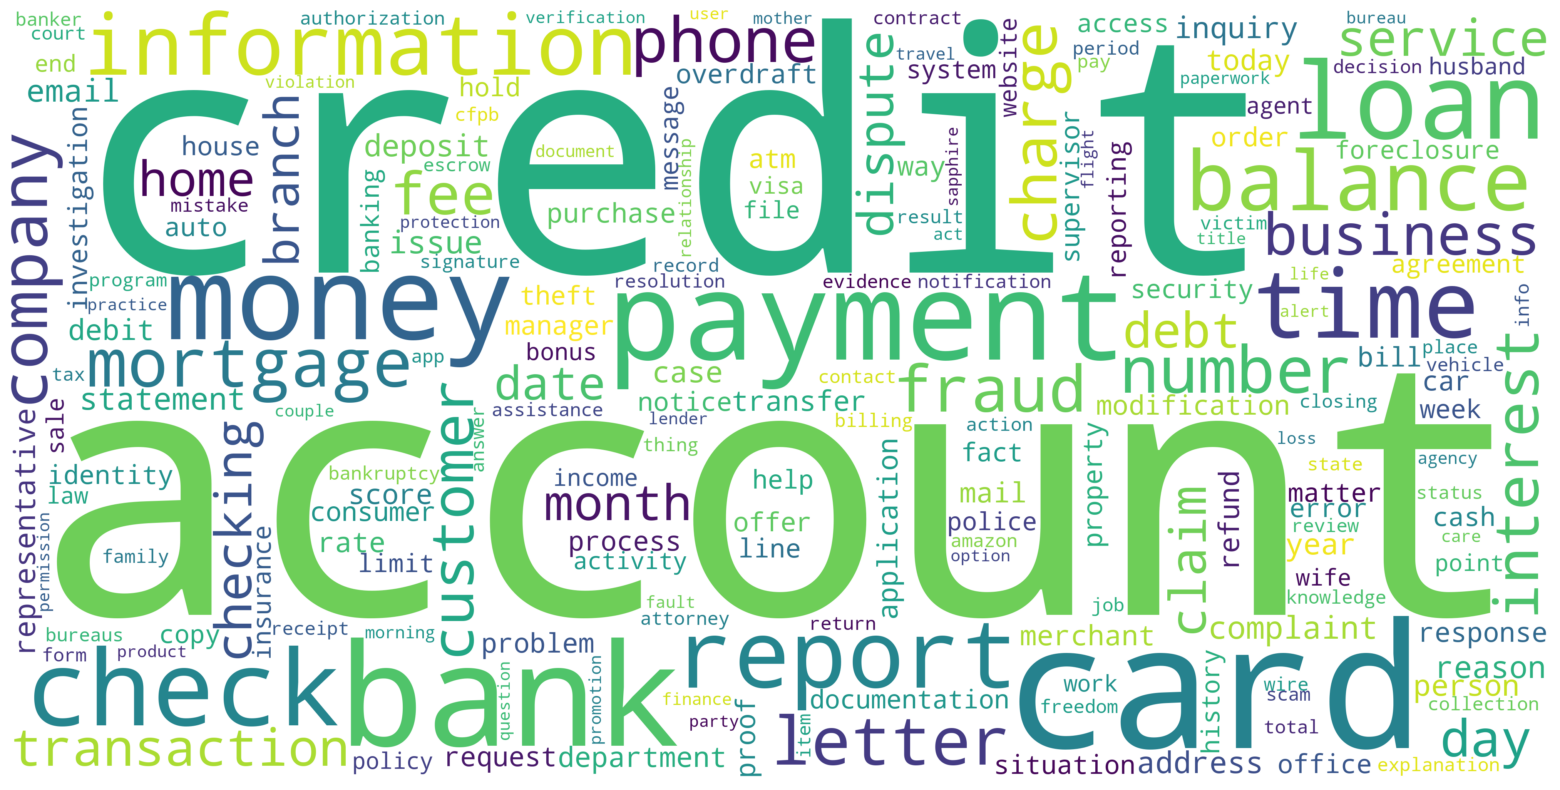

{'account': 2043.409340182325, 'credit': 1806.1354216059324, 'card': 1542.7820759768745, 'bank': 982.4745449209184, 'payment': 943.5118973444434}


In [28]:
COMPLAINT = df['cleaned_complaint_text']
GenerateWordCloud(COMPLAINT)

### Feature Extraction

In [29]:
tfidf = TfidfVectorizer(min_df=2, max_df=0.95, stop_words='english')

In [30]:
dtm = tfidf.fit_transform(df['cleaned_complaint_text'])
dtm

<21072x5308 sparse matrix of type '<class 'numpy.float64'>'
	with 453259 stored elements in Compressed Sparse Row format>

# Topic Modelling using NMF

### Convert the raw text into a matrix of TF-IDF features.

In [31]:
from sklearn.decomposition import NMF

In [32]:
nmf = NMF(n_components=5, random_state=40)

In [33]:
nmf.fit(dtm)
len(tfidf.get_feature_names())

5308

In [34]:
H1 = nmf.components_

### Print the Top 15 words for each Category

In [35]:
words = np.array(tfidf.get_feature_names())
category_word = pd.DataFrame(np.zeros((5, 15)), index=[f'Category {i + 1}' for i in range(5)],
                           columns=[f'Word {i + 1}' for i in range(15)]).astype(str)
for i in range(5):
    ix = H1[i].argsort()[::-1][:15]
    category_word.iloc[i] = words[ix]

category_word

,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14,Word 15
Category 1,account,bank,money,check,checking,branch,deposit,number,business,fraud,transaction,claim,information,customer,day
Category 2,credit,report,inquiry,score,debt,information,reporting,account,bureaus,limit,identity,theft,history,letter,application
Category 3,loan,mortgage,home,modification,property,foreclosure,letter,time,house,rate,sale,information,process,company,income
Category 4,card,credit,charge,fraud,company,dispute,fee,merchant,purchase,debit,time,number,balance,service,phone
Category 5,payment,balance,month,fee,statement,auto,date,time,day,error,car,history,account,transfer,credit


In [36]:
category_result = nmf.transform(dtm)

In [37]:
df['label'] = category_result.argmax(axis=1)
df.head()

,complaint_text,category,cleaned_complaint_text,text_length,label
0,Good morning my name is XXXX XXXX and I appreciate it if you could help me put a stop to Chase Bank cardmember services. \nIn 2018 I wrote to Chase asking for debt verification and what they sent me a statement which is not acceptable. I am asking the bank to validate the debt. Instead I been receiving mail every month from them attempting to collect a debt. \nI have a right to know this information as a consumer. \n\nChase account # XXXX XXXX XXXX XXXX Thanks in advance for your help.,Debt collection + Credit card debt,morning stop debt verification statement bank debt mail month debt right information consumer account advance help,16,0
1,I upgraded my XXXX XXXX card in XX/XX/2018 and was told by the agent who did the upgrade my anniversary date would not change. It turned the agent was giving me the wrong information in order to upgrade the account. XXXX changed my anniversary date from XX/XX/XXXX to XX/XX/XXXX without my consent! XXXX has the recording of the agent who was misled me.,Credit card or prepaid card + General-purpose credit card or charge card,agent anniversary date agent information order account anniversary date consent recording agent,12,0
2,"Chase Card was reported on XX/XX/2019. However, fraudulent application have been submitted my identity without my consent to fraudulently obtain services. Do not extend credit without verifying the identity of the applicant.","Credit reporting, credit repair services, or other personal consumer reports + Other personal consumer report",card application identity consent credit identity applicant,7,1
3,"On XX/XX/2018, while trying to book a XXXX XXXX ticket, I came across an offer for {$300.00} to be applied towards the ticket if I applied for a rewards card. I put in my information for the offer and within less than a minute, was notified via the screen that a decision could not be made. I immediately contacted XXXX and was referred to Chase Bank. I then immediately contacted Chase bank within no more than 10minutes of getting the notification on the screen and I was told by the Chase representative I spoke with that my application was denied but she could not state why. I asked for more information about the XXXX offer and she explained that even if I had been approved, the credit offer only gets applied after the first account statement and could not be used to purchase the ticket. I then explicitly told her I was glad I got denied and I was ABSOLUTELY no longer interested in the account. I asked that the application be withdrawn and the representative obliged. This all happened no later than 10mins after putting in the application on XX/XX/2018. Notwithstanding my explicit request not to proceed with the application and contrary to what I was told by the Chase representative, Chase did in fact go ahead to open a credit account in my name on XX/XX/2018. This is now being reported in my Credit Report and Chase has refused to correct this information on my credit report even though they went ahead to process an application which I did not consent to and out of their error.","Credit reporting, credit repair services, or other personal consumer reports + Credit reporting",ticket offer ticket card information offer minute screen decision notification screen representative application information offer credit offer account statement ticket account application representative application request application representative fact credit account credit report information credit report application error,37,1
4,my grand son give me check for {$1600.00} i deposit it into my chase account after fund clear my chase bank closed my account never paid me my money they said they need to speek with my grand son check was clear money was taking by my chase bank refuse to pay me my money my grand son called chase 2 times they told him i should call not him to verify the check owner he is out the country most the time date happ

### Create the dictionary of Category names and Category numbers

In [38]:
Category_names = { 0:"Banking Services", 1:"Card", 2:"Loans", 3:"Fraudalent Reporting", 4:"Others" }
df['label_name'] = df['label'].map(Category_names)
df.head()

,complaint_text,category,cleaned_complaint_text,text_length,label,label_name
0,Good morning my name is XXXX XXXX and I appreciate it if you could help me put a stop to Chase Bank cardmember services. \nIn 2018 I wrote to Chase asking for debt verification and what they sent me a statement which is not acceptable. I am asking the bank to validate the debt. Instead I been receiving mail every month from them attempting to collect a debt. \nI have a right to know this information as a consumer. \n\nChase account # XXXX XXXX XXXX XXXX Thanks in advance for your help.,Debt collection + Credit card debt,morning stop debt verification statement bank debt mail month debt right information consumer account advance help,16,0,Banking Services
1,I upgraded my XXXX XXXX card in XX/XX/2018 and was told by the agent who did the upgrade my anniversary date would not change. It turned the agent was giving me the wrong information in order to upgrade the account. XXXX changed my anniversary date from XX/XX/XXXX to XX/XX/XXXX without my consent! XXXX has the recording of the agent who was misled me.,Credit card or prepaid card + General-purpose credit card or charge card,agent anniversary date agent information order account anniversary date consent recording agent,12,0,Banking Services
2,"Chase Card was reported on XX/XX/2019. However, fraudulent application have been submitted my identity without my consent to fraudulently obtain services. Do not extend credit without verifying the identity of the applicant.","Credit reporting, credit repair services, or other personal consumer reports + Other personal consumer report",card application identity consent credit identity applicant,7,1,Card
3,"On XX/XX/2018, while trying to book a XXXX XXXX ticket, I came across an offer for {$300.00} to be applied towards the ticket if I applied for a rewards card. I put in my information for the offer and within less than a minute, was notified via the screen that a decision could not be made. I immediately contacted XXXX and was referred to Chase Bank. I then immediately contacted Chase bank within no more than 10minutes of getting the notification on the screen and I was told by the Chase representative I spoke with that my application was denied but she could not state why. I asked for more information about the XXXX offer and she explained that even if I had been approved, the credit offer only gets applied after the first account statement and could not be used to purchase the ticket. I then explicitly told her I was glad I got denied and I was ABSOLUTELY no longer interested in the account. I asked that the application be withdrawn and the representative obliged. This all happened no later than 10mins after putting in the application on XX/XX/2018. Notwithstanding my explicit request not to proceed with the application and contrary to what I was told by the Chase representative, Chase did in fact go ahead to open a credit account in my name on XX/XX/2018. This is now being reported in my Credit Report and Chase has refused to correct this information on my credit report even though they went ahead to process an application which I did not consent to and out of their error.","Credit reporting, credit repair services, or other personal consumer reports + Credit reporting",ticket offer ticket card information offer minute screen decision notification screen representative application information offer credit offer account statement ticket account application representative application request application representative fact credit account credit report information credit report application error,37,1,Card
4,my grand son give me check for {$1600.00} i deposit it into my chase account after fund clear my chase bank closed my account never paid me my money they said they need to speek with my grand son check was clear money was taking by my chase bank refuse to pay me my money my grand son called chase 2 times they told him i should call not him to verify the ch

<AxesSubplot:xlabel='label_name', ylabel='count'>

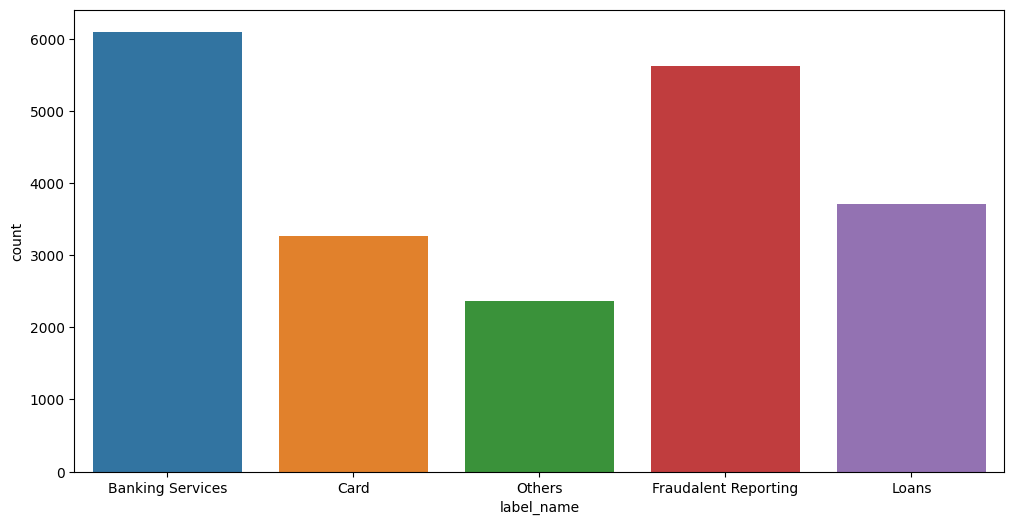

In [39]:
# Plot graph to check class imbalance
plt.figure(figsize=(12,6))
sns.countplot(x='label_name',data=df)

# Model building using Supervised Learning

In [40]:
training_data = df[['cleaned_complaint_text','label']]
training_data.head()

,cleaned_complaint_text,label
0,morning stop debt verification statement bank debt mail month debt right information consumer account advance help,0
1,agent anniversary date agent information order account anniversary date consent recording agent,0
2,card application identity consent credit identity applicant,1
3,ticket offer ticket card information offer minute screen decision notification screen representative application information offer credit offer account statement ticket account application representative application request application representative fact credit account credit report information credit report application error,1
4,son check account fund bank account money son check money bank money son check owner country time date check number claim number,0


In [41]:
training_data[['cleaned_complaint_text','label']][training_data.label==2].head(10)

,cleaned_complaint_text,label
23,loan modification runaround mo,2
30,reinstatement order foreclosure property trustee payoff order foreclosure date family resident time reinstatement foreclosure chapter bankruptcy filing foreclosure trustee family default claim complaint complaint product mortgage issue foreclosure,2
32,loan title time resolution time state registration state title car car,2
41,payment loan modification loss mitigation assistance help loan forbearance option issue refinancing debt time credit score,2
47,member auto finance gap insurance waiver coverage time financing agreement premium vehicle auto finance vehicle financing agreement option gap insurance provider gap insurance gap waiver addendum insurance agreement auto finance deficiency event vehicle auto finance vehicle letter vehicle vehicle accident gap insurance waiver loss lien vehicle salvage value bank commitment deficiency insurance payout balance loan salvage value,2
67,mortgage loan property home insurance company month mortgage loan account loan number loan account purpose mortgage company information phone department loan success response loan form loan property home insurance company home insurance payment loan loan account kind loan information statute limit action,2
87,debt resolution program number contact credit company today office meeting man boss lawyer day work place work job risk number,2
89,debt behalf s address cosigner address splicing state cancellation cosigner repayment fact cosigner knowledge paperwork affect address phone number phone cosigner account scrap paper financing record loan proof fact credit phone woman information student number bank branch information email attempt information touch branch manager information grievance behalf complaint compliance department complaint compliance department information research team search touch question recovery loan documentation loan specialist woman loan cosigner credit report statement loan issue contract post contract loan contract loan number t cosigner information man cosigner contract phone cosigner information loan cosigner fact time address idea address information credit credit reporting dept s business documentation s address piece paper loan misinformation proof fact responsibility supervisor charge answer proof voicemail message contact information phone voicemail greeting callback place business,2
93,mortgage month provider communication checking account today mortgage bankruptcy mortgage holder pain mortgage verification letter payment credit file payment history transfer date mortgage company sack errant credit report payment credit bureaus mortgage person mortgage verification rest review process,2
110,complaint home foreclosure contract court agreement estate agent process sale home contract review consideration letter contract letter home foreclosure contract buyer sale agreement closing date sale court sale seller title home bankruptcy lien sale bankruptcy agreement approval sale closing home foreclosure auction party sale bankruptcy court sale seller title approval sale bankruptcy home foreclosure foreclosure credit case negligence approval sale credit state sale home process closing foreclosure sale homeowner title,2


In [42]:
# X-y split
X = training_data.cleaned_complaint_text
y = training_data.label

In [43]:
# Fit transform the X
count_vect = CountVectorizer()
X_vect = count_vect.fit_transform(X)

In [44]:
# Fit transform word vector to TF-IDF
tfidf_transformer = TfidfTransformer()
X_tfidf = tfidf_transformer.fit_transform(X_vect)

### Train Test Split

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.25, random_state=40, stratify=y)

In [46]:
# Importing Libraries to build 3 models and evaluate them using the required metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_recall_fscore_support

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


In [47]:
# utlity function to display the model report

def display_classification_report(model,metric):
    
    y_train_pred_proba = model.predict_proba(X_train)
    y_test_pred_proba = model.predict_proba(X_test)
    roc_auc_score_train = round(roc_auc_score(y_train, y_train_pred_proba,average='weighted',multi_class='ovr'),2)
    roc_auc_score_test = round(roc_auc_score(y_test, y_test_pred_proba,average='weighted',multi_class='ovr'),2)
    print("ROC AUC Score Train:", roc_auc_score_train)
    print("ROC AUC Score Test:", roc_auc_score_test)
    metric.append(roc_auc_score_train)
    metric.append(roc_auc_score_test)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
  
    precision_train,recall_train,fscore_train,support_train=precision_recall_fscore_support(y_train,y_train_pred,average='weighted')
    precision_test,recall_test,fscore_test,support_test=precision_recall_fscore_support(y_test,y_test_pred,average='weighted')
    
    acc_score_train = round(accuracy_score(y_train,y_train_pred),2)
    acc_score_test = round(accuracy_score(y_test,y_test_pred),2)
    
    metric.append(acc_score_train)
    metric.append(acc_score_test)
    metric.append(round(precision_train,2))
    metric.append(round(precision_test,2))
    metric.append(round(recall_train,2))
    metric.append(round(recall_test,2))
    metric.append(round(fscore_train,2))
    metric.append(round(fscore_test,2))
    
    print('Train Accuracy :',acc_score_train)
    print('Test Accuracy :',acc_score_test)
        
    model_report_train = classification_report(y_train,y_train_pred)
    model_report_test = classification_report(y_test,y_test_pred)
    
    print('Classification Report for Train:\n',model_report_train)
    print('Classification Report for Test:\n',model_report_test)


    # Plot the confusion matrix
    fig, ax = plt.subplots(figsize=(12, 8))
    # Create the confusion matrix
    cm = confusion_matrix(y_test, y_test_pred)
    cmp = ConfusionMatrixDisplay(cm, display_labels=model.classes_)
    cmp.plot(ax=ax)
    plt.xticks(rotation=80)

    plt.show()

### Logistic Regression Classification

ROC AUC Score Train: 1.0
ROC AUC Score Test: 1.0
Train Accuracy : 0.98
Test Accuracy : 0.95
Classification Report for Train:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      4576
           1       0.99      0.96      0.98      2451
           2       0.98      0.98      0.98      2783
           3       0.97      0.99      0.98      4223
           4       0.99      0.93      0.96      1771

    accuracy                           0.98     15804
   macro avg       0.98      0.97      0.97     15804
weighted avg       0.98      0.98      0.98     15804

Classification Report for Test:
               precision    recall  f1-score   support

           0       0.93      0.98      0.96      1526
           1       0.97      0.91      0.94       817
           2       0.95      0.94      0.95       928
           3       0.94      0.96      0.95      1407
           4       0.97      0.88      0.93       590

    accuracy              

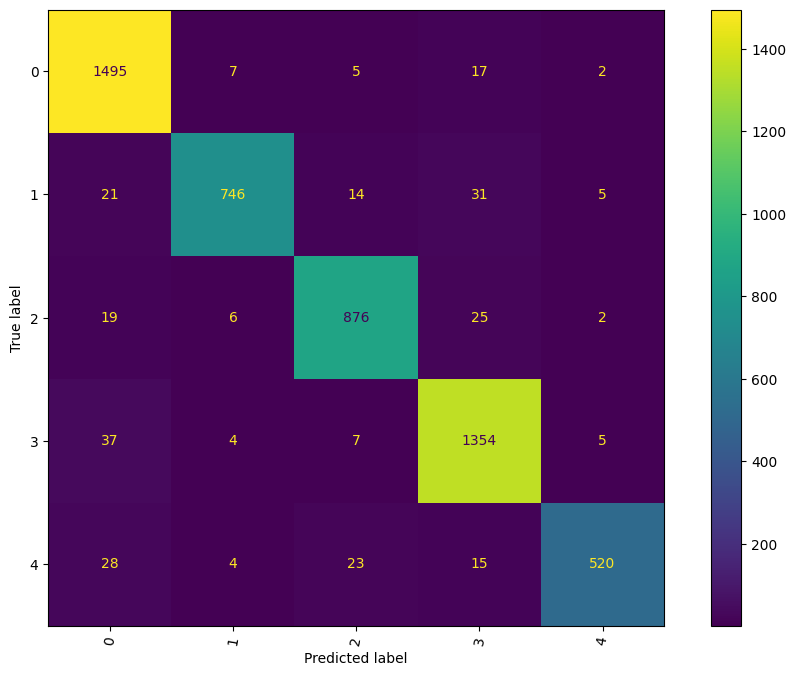

In [48]:
log_reg = LogisticRegression(random_state=40,solver='liblinear')
# fit model
log_reg.fit(X_train,y_train)
# display classification report
metric2=[]
display_classification_report(log_reg,metric2)

### Descision Tree Classification

ROC AUC Score Train: 1.0
ROC AUC Score Test: 0.91
Train Accuracy : 1.0
Test Accuracy : 0.86
Classification Report for Train:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4576
           1       1.00      1.00      1.00      2451
           2       1.00      1.00      1.00      2783
           3       1.00      1.00      1.00      4223
           4       1.00      1.00      1.00      1771

    accuracy                           1.00     15804
   macro avg       1.00      1.00      1.00     15804
weighted avg       1.00      1.00      1.00     15804

Classification Report for Test:
               precision    recall  f1-score   support

           0       0.88      0.89      0.89      1526
           1       0.85      0.82      0.83       817
           2       0.86      0.85      0.85       928
           3       0.87      0.88      0.87      1407
           4       0.82      0.81      0.82       590

    accuracy              

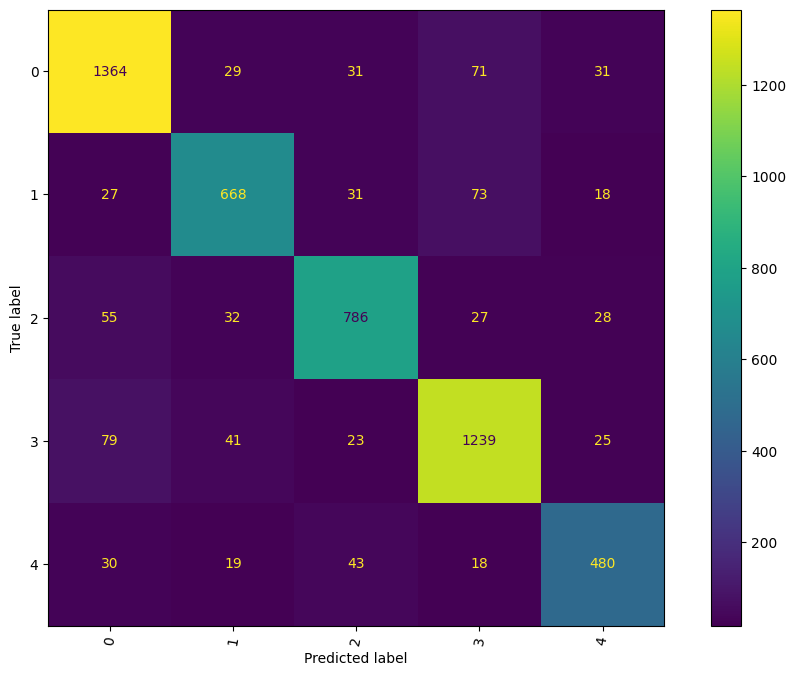

In [49]:
dtc = DecisionTreeClassifier(random_state=40)
# fit model
dtc.fit(X_train,y_train)
# Decision Tree Classification Report
metric3=[]
display_classification_report(dtc,metric3)

### Random Forest Classification

OOB SCORE : 0.8757909390027842
ROC AUC Score Train: 1.0
ROC AUC Score Test: 0.99
Train Accuracy : 1.0
Test Accuracy : 0.87
Classification Report for Train:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4576
           1       1.00      1.00      1.00      2451
           2       1.00      1.00      1.00      2783
           3       1.00      1.00      1.00      4223
           4       1.00      1.00      1.00      1771

    accuracy                           1.00     15804
   macro avg       1.00      1.00      1.00     15804
weighted avg       1.00      1.00      1.00     15804

Classification Report for Test:
               precision    recall  f1-score   support

           0       0.86      0.94      0.90      1526
           1       0.90      0.80      0.85       817
           2       0.89      0.89      0.89       928
           3       0.85      0.92      0.88      1407
           4       0.94      0.66      0.77       

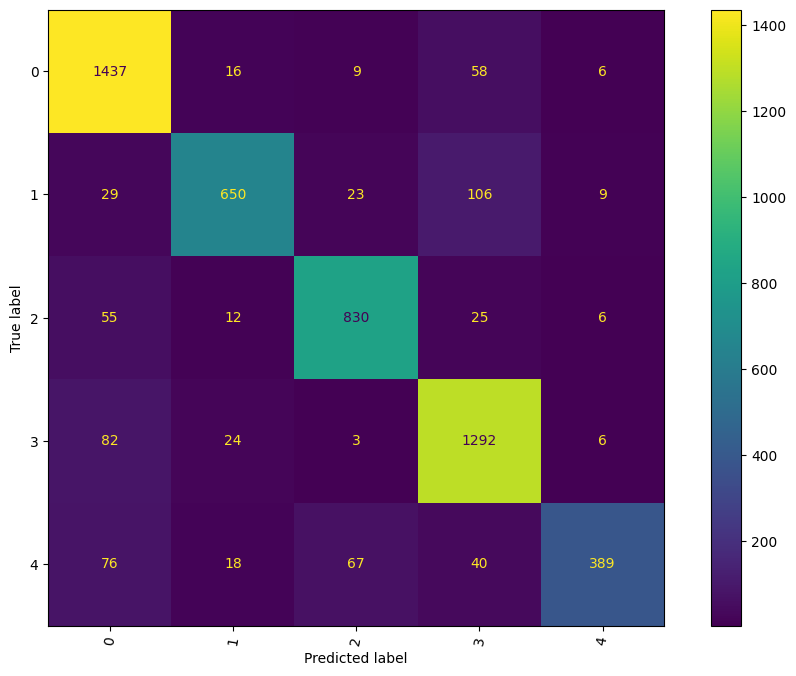

In [50]:
rf = RandomForestClassifier(n_estimators = 500,random_state=40, n_jobs = -1,oob_score=True)
# fit model
rf.fit(X_train,y_train)

# oob score
print('OOB SCORE :',rf.oob_score_)

# Random Forest Classification Report
metric4=[]
display_classification_report(rf,metric4)

# Model Inference

In [51]:
table = {'Metric': ['ROC_AUC Score(Train)','ROC_AUC Score(Test)',
                    'Accuracy(Train)','Accuracy(Test)',
                    'Precision(Train)','Precision(Test)',
                    'Recall(Train)','Recall(Test)',
                    'F1-Score(Train)','F1-Score(Test)'
                   ]
        }


metric = pd.DataFrame(table ,columns = ['Metric'] )
log_metric = pd.Series(metric2, name = 'Logistic Regression')
dtc_metric = pd.Series(metric3, name = 'Decision Tree Classifier')
rfc_metric = pd.Series(metric4, name = 'Random Forest Classifier')

final_metric = pd.concat([metric, log_metric,dtc_metric,rfc_metric], axis = 1)

final_metric

,Metric,Logistic Regression,Decision Tree Classifier,Random Forest Classifier
0,ROC_AUC Score(Train),1.00,1.00,1.00
1,ROC_AUC Score(Test),1.00,0.91,0.99
2,Accuracy(Train),0.98,1.00,1.00
3,Accuracy(Test),0.95,0.86,0.87
4,Precision(Train),0.98,1.00,1.00
5,Precision(Test),0.95,0.86,0.88
6,Recall(Train),0.98,1.00,1.00
7,Recall(Test),0.95,0.86,0.87
8,F1-Score(Train),0.98,1.00,1.00
9,F1-Score(Test),0.95,0.86,0.87
